# Slurp public photometry and spectroscopy at an FRB position

In [1]:
# imports
from matplotlib import pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units
from astropy.wcs import WCS

from frb.surveys import survey_utils

/home/xavier/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


## DES

### Target

In [2]:
coord = SkyCoord('J214425.25-403400.81', unit=(units.hourangle, units.deg))
search_r = 10 * units.arcsec

### Search

In [3]:
des_srvy = survey_utils.load_survey_by_name('DES', coord, search_r)
des_tbl = des_srvy.get_catalog(print_query=True)

SELECT mag_auto_g, magerr_auto_g, mag_auto_r, magerr_auto_r, mag_auto_i, magerr_auto_i, mag_auto_z, magerr_auto_z, mag_auto_y, magerr_auto_y, coadd_object_id, ra, dec, tilename
FROM des_dr1.main
WHERE q3c_radial_query(ra,dec,326.105208,-40.566892,0.002778)
Returning Pandas dataframe
SELECT w1mpro, w1sigmpro, w2mpro, w2sigmpro, w3mpro, w3sigmpro, w4mpro, w4sigmpro, coadd_object_id, des_ra, des_dec, ra, dec
FROM des_dr1.des_allwise
WHERE q3c_radial_query(ra,dec,326.105208,-40.566892,0.002778)
Returning Pandas dataframe


In [4]:
des_tbl

DES_g,DES_g_err,DES_r,DES_r_err,DES_i,DES_i_err,DES_z,DES_z_err,DES_Y,DES_Y_err,DES_ID,ra,dec,DES_tile
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str12
23.9905,0.194438,22.3105,0.0595304,20.9695,0.029651599999999997,20.4385,0.0391535,20.292,0.100701,209895628,326.105565,-40.569421999999996,DES2143-4040


### Cut-out

In [5]:
cutout = des_srvy.get_cutout(search_r, band='r')

In [6]:
wcs = WCS(des_srvy.cutout_hdr)

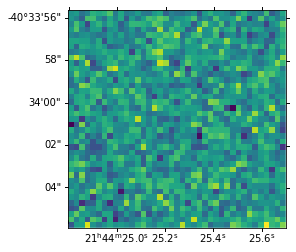

In [7]:
plt.clf()
plt.subplot(projection=wcs)
plt.imshow(cutout, origin='lower')
plt.show()

## FIRST

In [8]:
coord2 = SkyCoord('J081240.68+320809', unit=(units.hourangle, units.deg))
search_r = 10 * units.arcsec

In [9]:
first_srvy = survey_utils.load_survey_by_name('FIRST', coord2, search_r)
first_tbl = first_srvy.get_catalog()

In [10]:
first_tbl

NAME,ra,dec,FLUX_20_CM,FLUX_20_CM_ERROR,INT_FLUX_20_CM,SIDELOBE_PROB,TWOMASS_FIRST_OFFSET,TWOMASS_KMAG,SEARCH_OFFSET_,separation
,deg,deg,MJY,MJY,MJY,,ARCSEC,MAG,,arcmin
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes46,float64
FIRST J081240.6+320808,123.169512,32.135697,18.32,0.146,18.40,0.014,0.31,15.31,"0.008 (123.16950579044646,32.135827323283664)",0.008202689831452928


## DECals

In [11]:
dec_srvy = survey_utils.load_survey_by_name('DECaL', coord2, search_r)
dec_tbl = dec_srvy.get_catalog()

Returning Pandas dataframe


In [12]:
dec_tbl

DECaL_ID,brick_primary,DECaL_brick,ra,dec,DECaL_g,DECaL_r,DECaL_z,DECaL_W1,DECaL_W2,DECaL_W3,DECaL_W4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7696614636322962,1,507231,123.167713619484,32.134174062069604,20.6186,19.535,18.9672,20.2099,20.48,21.3003,--,149.126,135.514,138.435,13.3685,4.57341,0.092629,-0.8989540000000001
7696614636322963,1,507231,123.169525538404,32.1357157995354,17.8242,17.4195,17.0851,17.0561,16.8557,15.5268,14.7015,763.3380000000001,536.565,627.393,244.87,128.44899999999998,18.8387,5.95385
